In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

sns.set(style="whitegrid")


# Problema 1: Publicidad y Ventas

El departamento de marketing de una empresa registró durante 100 meses la inversión en publicidad digital (en miles de dólares) y las unidades vendidas. Necesitan cuantificar cómo afecta el gasto en publicidad a las ventas para optimizar su presupuesto.


In [5]:
df=pd.read_csv('PublicidadVentas.csv')
print(df.head())
print(df.describe())
print(df.info())


   Inversion  Ventas
0        1.2     180
1        1.5     210
2        1.8     250
3        2.0     280
4        2.2     300
       Inversion       Ventas
count  70.000000    70.000000
mean    9.880000   908.000000
std     5.093605   410.071044
min     1.200000   180.000000
25%     5.575000   565.000000
50%     9.900000   910.000000
75%    14.150000  1255.000000
max    18.500000  1600.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Inversion  70 non-null     float64
 1   Ventas     70 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.2 KB
None


In [7]:
X=df[["Inversion"]].values
y=df["Ventas"].values
#print(f"X:\n {X}\ny:\n{y}")


In [8]:
#División de datos:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)
#Entrenamiento
md=LinearRegression()
md.fit(X_train,y_train)


LinearRegression()

In [10]:
#Evaluación
y_predic=md.predict(X_test)
mse=mean_squared_error(y_test,y_predic)
r2=r2_score(y_test,y_predic)

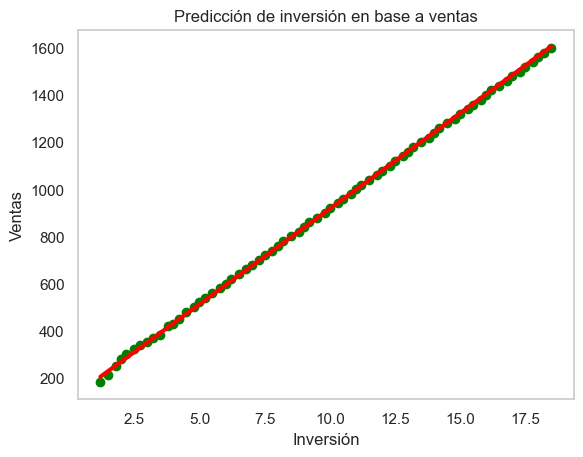

In [11]:
#Visualización
#plt.figure(figsize=(1600,19))
plt.title("Predicción de inversión en base a ventas")
plt.scatter(X,y,color='Green')
plt.plot(X,md.predict(X),color='red',linewidth=3)
plt.grid()
plt.xlabel("Inversión")
plt.ylabel("Ventas")
plt.show()

In [12]:
def estimacion(inv):
    inve_array=[[inv]]
    ventas_estimadas=md.predict(inve_array)
    return ventas_estimadas[0]

In [13]:
inversion=2.7
ventasEst=estimacion(inversion)
print(f"El número de ventas estimadas en base a la inversión de {inversion} es de: {ventasEst:.2f}")

El número de ventas estimadas en base a la inversión de 2.7 es de: 325.75


# Problema 2: Edad y Costo de Seguro

Una aseguradora tiene datos de 120 clientes con su edad y el costo mensual de su póliza. Requieren modelar cómo aumenta el costo con la edad para ajustar sus tarifas.


In [14]:
df1=pd.read_csv('EdadSeguros.csv')
print(df1.head())
print(df1.describe())
print(df1.info())


   Edad   Costo
0     18     22
1     22     24
2     23     55
3     25     27
4     27     85
          Edad       Costo
count  80.00000  80.000000
mean   53.75000  52.162500
std    15.38987  24.120186
min    18.00000   5.000000
25%    42.75000  35.000000
50%    56.00000  55.000000
75%    66.00000  65.750000
max    79.00000  96.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Edad    80 non-null     int64
 1   Costo   80 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB
None


In [15]:
X1=df1[["Edad "]].values
y1=df1["Costo"].values

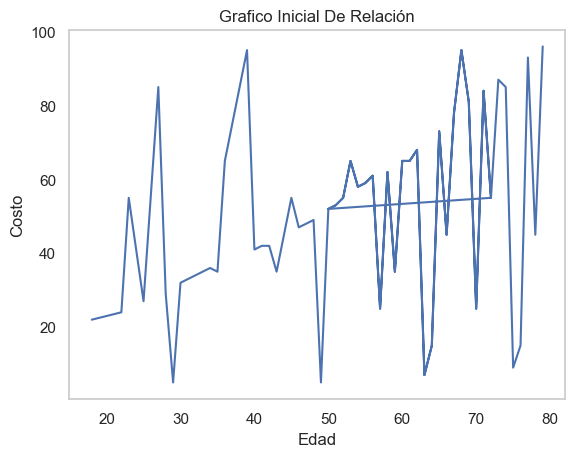

In [16]:
plt.plot(X1,y1)
plt.title("Grafico Inicial De Relación")
plt.xlabel("Edad")
plt.ylabel("Costo")
plt.grid()
plt.show()


In [17]:
#Entrenamiento del modelo
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1, train_size=0.2,random_state=42)
md1=LinearRegression()
md1.fit(X_train1,y_train1)


LinearRegression()

In [18]:
# Predicciones
y_pred=md1.predict(X_test1)

# Residuales y error estándar
residuals = y_test1 - y_pred
dof = len(X_test1) - 2  # Grados de libertad
mse = mean_squared_error(y_test1, y_pred)
se = np.sqrt(mse * (1/len(X_test1) + (X_test1 - X_test1.mean())**2 / np.sum((X_test1 - X_test1.mean())**2)))
t_value = stats.t.ppf(0.975, dof)  # 95% confianza

# Intervalos
limiteInferior = y_pred - t_value * se.flatten()
limiteSuperior = y_pred + t_value * se.flatten()

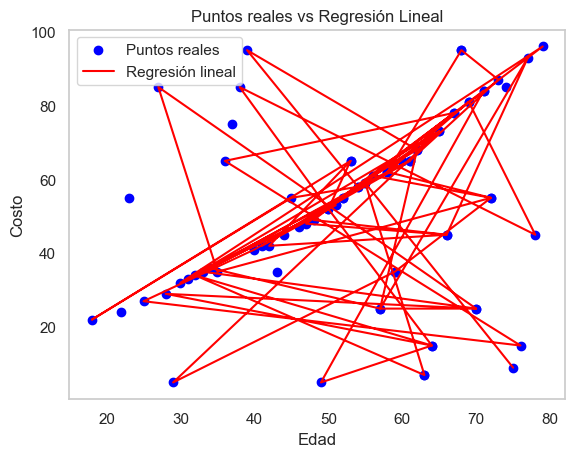

In [19]:
plt.scatter(X1,y1, label="Puntos reales", color= "blue")
plt.plot(X_test1,y_test1, label="Regresión lineal", color= "red")
plt.title("Puntos reales vs Regresión Lineal")
plt.xlabel("Edad")
plt.ylabel("Costo")
plt.grid()
plt.legend()
plt.show()

In [20]:
#Tabla de edades clave
edadesC=pd.DataFrame({"Edad":[30,40,50,60]})
prediccion=md1.predict(edadesC)

tabla=pd.DataFrame({
    "Edad": edadesC["Edad"],
    "Costo Predicho": prediccion
})

print(tabla)

   Edad  Costo Predicho
0    30       41.554364
1    40       47.367375
2    50       53.180386
3    60       58.993397


c:\Users\uriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Problema 3: Horas de Práctica y Puntaje en Examen

Un instructor de programación recolectó datos de 150 estudiantes registrando las horas de práctica semanal y sus puntuaciones finales en el examen. Quiere determinar si existe una relación lineal entre estas variables y poder predecir la puntuación esperada según las horas de práctica.


In [21]:
df2=pd.read_csv('PracticaExamenes.csv')
print(df2.head())
print(df2.describe())
print(df2.info())

   horas  puntuacion
0      3          64
1      4          67
2      6          76
3      3          65
4      5          72
            horas  puntuacion
count  150.000000  150.000000
mean     3.513333   65.360000
std      1.759868    9.277439
min      1.000000   50.000000
25%      2.000000   58.000000
50%      4.000000   66.000000
75%      5.000000   73.000000
max      6.000000   80.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   horas       150 non-null    int64
 1   puntuacion  150 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB
None


In [22]:
X2=df2[["horas"]]
y2=df2["puntuacion"]

X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,train_size=0.2,random_state=42)


In [23]:
md2=LinearRegression()
md2.fit(X_train2,y_train2)


LinearRegression()

In [24]:
#Determinar la ecuación de la recta (pendiente e intercepto)
intercepto=md2.intercept_
pendiente=md2.coef_[0]
print(f"Ecuación de la recta: {intercepto: .2f} + {pendiente: .2f} * horas")

Ecuación de la recta:  46.76 +  5.35 * horas


In [25]:
#Coeficiente de determinación
y_pred2=md2.predict(X2)
cd=r2_score(y2,y_pred2)

print(f"Coeficiente de determinación: {cd:.4f}")

Coeficiente de determinación: 0.9748


In [26]:
def pre_puntuacion(hrs):
    horas_array=[[hrs]]
    return md2.predict(horas_array)[0]

In [ ]:
horas_prueba=int(input("Ingresa las horas de prueba: "))
print(f"Tras {horas_prueba} horas de prueba la puntuación aumentaria un {pre_puntuacion(horas_prueba)}")